## Data Cleaning 

You'll notice that this dataset is by no means ready for analysis. We have:

* a numeric column interpreted as a string
* extra columns that are not relevant to our analysis
* multiple rows with missing values
* column names are too long

Let's "clean" our dataset by fixing these errors below.

In [72]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# TODO: load in excel file "../../data/raw/realestate.xlsx"
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
df = pd.read_excel('../../data/raw/realestate.xlsx')

# check how many missing values we have
df.isna().sum()

No                                         0
X2 house age                              11
X3 distance to the nearest MRT station     0
X4 number of convenience stores            1
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                 0
dtype: int64

In [74]:
# create dictionary of mappings
rename_dict = {
    "X2 house age": "house_age", 
    "X3 distance to the nearest MRT station": "distance_to_mrt", 
    "X4 number of convenience stores": "num_convenience_stores",
    "X5 latitude": "lat",
    "X6 longitude": "long",
    "Y house price of unit area": "price_unit_area"
}

# rename columns
df_rename = df.rename(columns=rename_dict)

# view new columns
df_rename.columns

Index(['No', 'house_age', 'distance_to_mrt', 'num_convenience_stores', 'lat',
       'long', 'price_unit_area'],
      dtype='object')

In [75]:
selected = ["lat", "long", "No"]

# TODO: Drop the selected columns 
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df_drop = df_rename.drop(labels=selected, axis=1)

df_drop.columns

Index(['house_age', 'distance_to_mrt', 'num_convenience_stores',
       'price_unit_area'],
      dtype='object')

In [76]:
# remove quotes from sample
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].str.strip("\"")

# TODO: convert the "distance_to_mrt" column to the "float" datatype
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
df_drop["distance_to_mrt"] = df_drop['distance_to_mrt'].astype(float)

df_drop.dtypes

house_age                 float64
distance_to_mrt           float64
num_convenience_stores    float64
price_unit_area           float64
dtype: object

In [77]:
# check current "shape" of dataframe
df_drop.shape

(414, 4)

In [78]:
# TODO: Remove missing values from this dataframe
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
df_drop = df_drop.dropna()

# check shape again
df_drop.shape

(403, 4)

## Explore Again

Now that we've cleaned our dataset, let's again explore the relationships & distributions of our dataset. 

Perhaps we missed something "qualitative" about our data that we should remove. 

In [79]:
# TODO: print out the summary statistics (mean, median, max, min, count) of all numeric columns
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
df_drop.describe()

,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
count,403.000000,403.000000,403.000000,403.000000
mean,18.607196,1070.118896,4.292804,38.106452
std,22.656541,1255.001088,5.636027,13.610588
min,0.000000,23.382840,-6.000000,7.600000
25%,8.700000,289.324800,1.000000,27.700000
50%,16.100000,492.231300,4.000000,38.600000
75%,28.300000,1442.932500,6.000000,46.600000
max,410.300000,6488.021000,100.000000,117.500000


In [80]:
# notice how the minimum value for "num_convenience_stores" is -6
# how do we have -6 convenience stores? this must be an error, let's remove it

df_outl = df_drop[df_drop.num_convenience_stores >= 0]
df_outl.shape

(402, 4)

In [81]:
# notice how the maximum value for "num_convenience_stores" is 100
# (the median convenice stores is 4, the mean is 4.29, this shows that this is most likely an error)

# TODO: implement this logic in the brackets
# documentation: https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing
df_outl = df_outl[df_outl['num_convenience_stores'] < 100]
df_outl.shape

(401, 4)

In [82]:
# notice how the maximum "house_age" is 410.3 years old 
# not looking at statistics, the oldest house in Taiwan was built in the 17th century (300 years at most)
# let's remove this value
df_outl = df_outl[df_outl.house_age != 410.3]
df_outl.shape

(400, 4)

<Axes: xlabel='price_unit_area', ylabel='Count'>

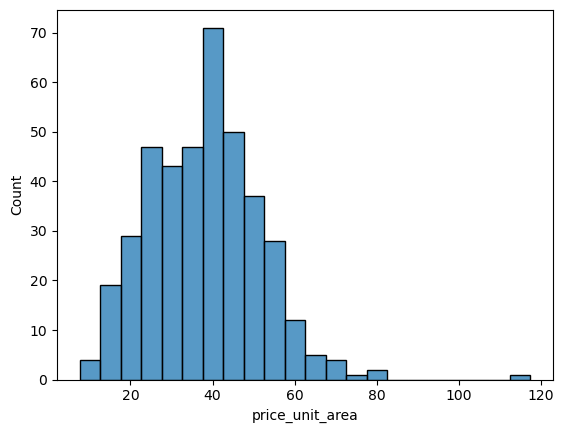

In [83]:
# let's explore our visualizations again, starting with univariate

# TODO : plot histogram of "price_unit_area" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl['price_unit_area'])

<Axes: xlabel='house_age', ylabel='Count'>

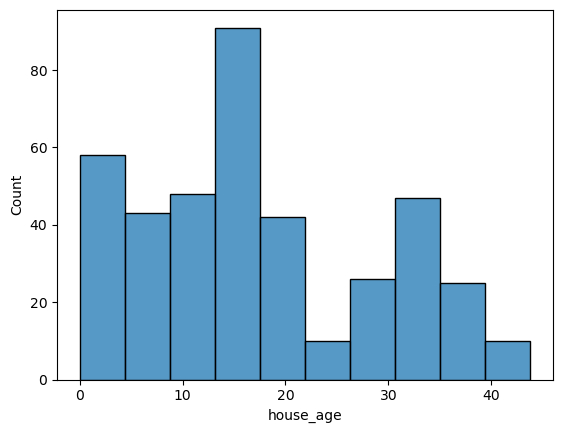

In [84]:
# TODO : plot histogram of "house_age" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl['house_age'])

<Axes: xlabel='num_convenience_stores', ylabel='Count'>

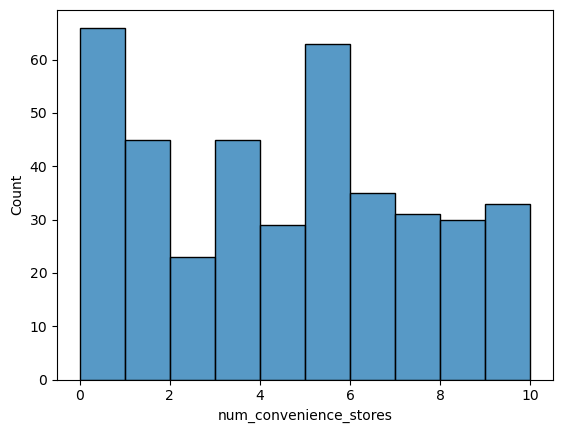

In [85]:
# TODO : plot histogram of "num_convenience_stores" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl['num_convenience_stores'])

<Axes: xlabel='distance_to_mrt', ylabel='Count'>

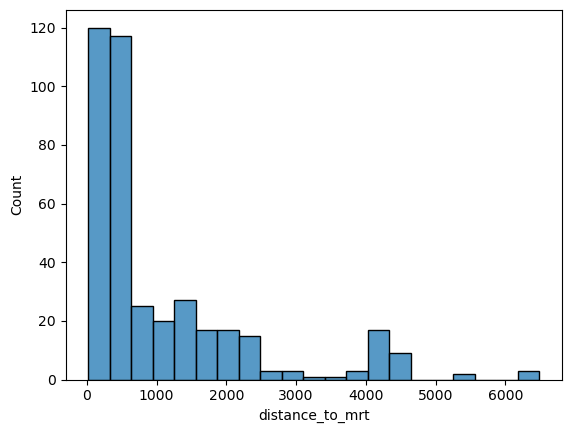

In [86]:
# TODO : plot histogram of "distance_to_mrt" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl['distance_to_mrt'])

<Axes: xlabel='house_age', ylabel='price_unit_area'>

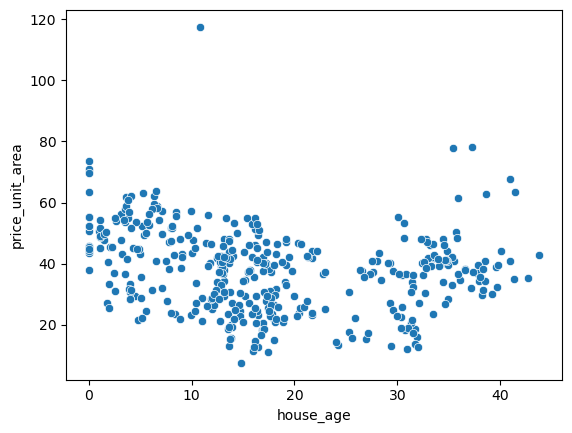

In [87]:
# next we move onto scatter-plots (bi-variate analysis)

# TODO : plot scatter plot of "house_age" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(x=df_outl['house_age'], y=df_outl['price_unit_area'])

<Axes: xlabel='num_convenience_stores', ylabel='price_unit_area'>

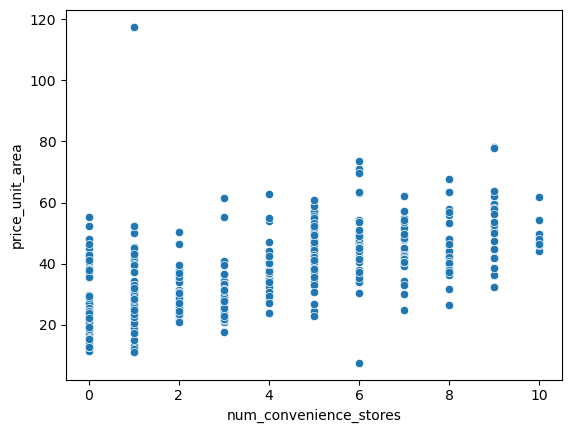

In [89]:
# TODO : plot scatter plot of "num_convenice_stores" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(x=df_outl['num_convenience_stores'], y=df_outl['price_unit_area'])

<Axes: xlabel='distance_to_mrt', ylabel='price_unit_area'>

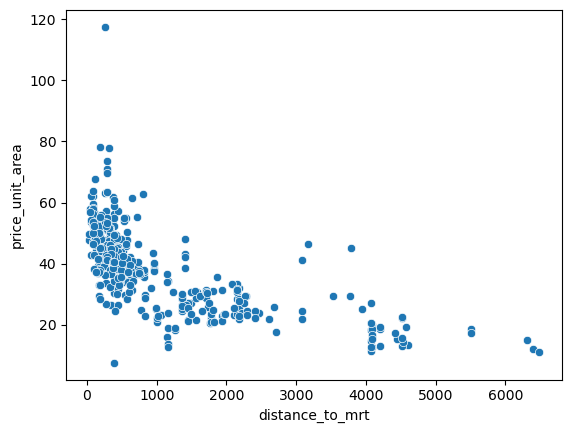

In [90]:
# TODO : plot scatter plot of "distance_to_mrt" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(x=df_outl['distance_to_mrt'], y=df_outl['price_unit_area'])

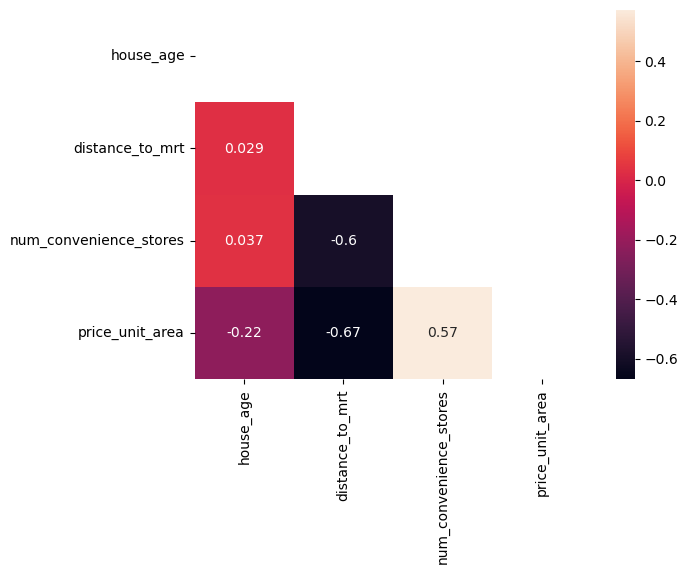

In [92]:
mask = np.triu(np.ones_like(df_outl.corr(), dtype=bool))

sns.heatmap(df_outl.corr(), annot=True, mask=mask)
plt.show()

In [93]:
# save data for later modeling
df_drop.to_csv("../../data/processed/tpdata.csv", index=False)